# Default Classification

In [72]:
## libraries

import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl

## estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

## model metrics/CV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
## import cleaned data
credit_raw = pd.read_csv("default of credit card clients cleaned.csv", header = 0)
credit_raw.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE_BIN,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,20,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,20,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,30,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,30,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,50,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
credit_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE_BIN      30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [5]:
# feature
features = credit_raw.iloc[:,0:23]
print("summary of feature sample")
features.head()

summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE_BIN,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,20,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,20,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,30,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,30,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,50,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [6]:
## dependent variable
depVar = credit_raw['DEFAULT']
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: DEFAULT, dtype: int64

In [7]:
## Training set 1 (as is)
X_train1 = features
y_train1 = depVar

In [8]:
## use train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train1, y_train1, test_size = 0.3 )

In [9]:
## examine that we have the right split
print(X_train1.shape, X_test1.shape)
print(y_train1.shape, y_test1.shape)

(21000, 23) (9000, 23)
(21000,) (9000,)


## Build and Train Model

In [11]:
## Models
SVM = SVC()
RF = RandomForestClassifier(n_jobs = 7)
kNN = KNeighborsClassifier(n_jobs = 7)
GBM= GradientBoostingClassifier()
NN = MLPClassifier()

### kNN

In [15]:
## Gridsearch parameters for kNN
kNN_param = {
    'n_neighbors' : [5,10,20]
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
kNN_grid = GridSearchCV(estimator = kNN, param_grid = kNN_param, return_train_score = True, cv=10)
kNN_grid = kNN_grid.fit(X_train1, y_train1)

In [16]:
## Examine best parameters
kNN_grid.cv_results_

{'mean_fit_time': array([0.03887808, 0.04996822, 0.09254668]),
 'std_fit_time': array([0.00181216, 0.00237031, 0.01687944]),
 'mean_score_time': array([0.10436857, 0.10433986, 0.11553512]),
 'std_score_time': array([0.00049304, 0.00048768, 0.03045705]),
 'param_n_neighbors': masked_array(data=[5, 10, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5}, {'n_neighbors': 10}, {'n_neighbors': 20}],
 'split0_test_score': array([0.7591623 , 0.78486435, 0.7829605 ]),
 'split1_test_score': array([0.75380952, 0.77714286, 0.7752381 ]),
 'split2_test_score': array([0.75761905, 0.78190476, 0.77904762]),
 'split3_test_score': array([0.76809524, 0.78619048, 0.78190476]),
 'split4_test_score': array([0.74952381, 0.77380952, 0.77761905]),
 'split5_test_score': array([0.73761905, 0.76142857, 0.77571429]),
 'split6_test_score': array([0.75619048, 0.77333333, 0.77666667]),
 'split7_test_score': array([0.75857143, 0.78142857, 0.

In [17]:
## set the classifier to best combination of parameters
kNN = kNN_grid.best_estimator_

In [18]:
## Fit best algorithm to the data
kNN.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=7, n_neighbors=20, p=2,
           weights='uniform')

In [19]:
## kNN mean accuray from 10-fold CV
scores = cross_val_score(kNN, X_train1, y_train1, cv=10)
print(scores.mean())

0.7793330739336416


In [20]:
## kNN Prediction on Test Set
kNNpred = kNN.predict(X_test1)
print(accuracy_score(y_test1,kNNpred))
print(classification_report(y_test1, kNNpred))

0.7753333333333333
             precision    recall  f1-score   support

          0       0.78      0.98      0.87      6955
          1       0.53      0.09      0.15      2045

avg / total       0.73      0.78      0.71      9000



### Random Forest

In [23]:
## Gridsearch parameters for RF
RF_param = {
    'n_estimators' : [10,20,30],
    'max_features' : ['auto', 'sqrt', 'log2']
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
RF_grid = GridSearchCV(estimator = RF, param_grid = RF_param, return_train_score = True, cv=10)
RF_grid = RF_grid.fit(X_train1, y_train1)

In [24]:
## Examine best parameters
RF_grid.cv_results_

{'mean_fit_time': array([0.21702232, 0.22396832, 0.34092455, 0.22041495, 0.3437459 ,
        0.55278494, 0.22081182, 0.35389955, 0.48795571]),
 'std_fit_time': array([0.00066045, 0.00104553, 0.03033365, 0.00594264, 0.03771218,
        0.06959531, 0.00117322, 0.04627926, 0.06000481]),
 'mean_score_time': array([0.10386128, 0.1030793 , 0.10305192, 0.10354786, 0.10416365,
        0.10388913, 0.10389163, 0.10406294, 0.10380609]),
 'std_score_time': array([0.00030725, 0.00011386, 0.00046786, 0.00050369, 0.00066621,
        0.00075842, 0.00042066, 0.00053331, 0.00037751]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt', 'log2',
                    'log2', 'log2'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
              mask=[False, False, False, False, False, F

In [25]:
## set the classifier to best combination of parameters
RF = RF_grid.best_estimator_

In [26]:
## Fit best algorithm to the data
RF.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=7,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
## RF mean accuray from 10-fold CV
scores = cross_val_score(RF, X_train1, y_train1, cv=10)
print(scores.mean())

0.8128099009934988


In [28]:
## RF Prediction on Test Set
RFpred = RF.predict(X_test1)
print(accuracy_score(y_test1,RFpred))
print(classification_report(y_test1, RFpred))

0.8084444444444444
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      6955
          1       0.64      0.36      0.46      2045

avg / total       0.79      0.81      0.79      9000



### GBM

In [29]:
## Gridsearch parameters for GBM
GBM_param = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.1,0.5]
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
GBM_grid = GridSearchCV(estimator = GBM, param_grid = GBM_param, return_train_score = True, cv=10)
GBM_grid = GBM_grid.fit(X_train1, y_train1)

In [30]:
## Examine best parameters
GBM_grid.cv_results_

{'mean_fit_time': array([3.37478256, 5.91818836, 8.4555877 , 2.80999603, 5.83340104,
        8.35155025]),
 'std_fit_time': array([0.63215339, 0.48802168, 0.36239344, 0.07086214, 0.32766294,
        0.1082092 ]),
 'mean_score_time': array([0.00509689, 0.00878563, 0.00734873, 0.00156236, 0.00784872,
        0.0093739 ]),
 'std_score_time': array([0.00083036, 0.00546949, 0.00746447, 0.00468707, 0.00700193,
        0.00765376]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'n_estimators': 100},
  {'learning_rate': 0.1, 'n_estimators': 200},
  {'learning_rate': 0.1, 'n_estimators': 300},
  {'learning_rate': 0.5, 'n_estimators': 1

In [31]:
## set the classifier to best combination of parameters
GBM = GBM_grid.best_estimator_

In [32]:
## Fit best algorithm to the data
GBM.fit(X_train1, y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [33]:
## GBM mean accuray from 10-fold CV
scores = cross_val_score(GBM, X_train1, y_train1, cv=10)
print(scores.mean())

0.823381216499358


In [34]:
## GBM Prediction on Test Set
GBMpred = GBM.predict(X_test1)
print(accuracy_score(y_test1,GBMpred))
print(classification_report(y_test1, GBMpred))

0.8143333333333334
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      6955
          1       0.67      0.37      0.47      2045

avg / total       0.80      0.81      0.79      9000



### SVM

In [35]:
## Fit stock algorithm to the data
SVM.fit(X_train1, y_train1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
## SVM mean accuray from 10-fold CV
scores = cross_val_score(SVM, X_train1, y_train1, cv=10)
print(scores.mean())

0.7821902168555724


In [37]:
## SVM Prediction on Test Set
SVMpred = SVM.predict(X_test1)
print(accuracy_score(y_test1,SVMpred))
print(classification_report(y_test1, SVMpred))

0.773
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      6955
          1       0.52      0.01      0.03      2045

avg / total       0.72      0.77      0.68      9000



## Neural Network

In [64]:
NN = MLPClassifier(hidden_layer_sizes = (69), max_iter = 300, random_state = 123)

In [65]:
## Gridsearch parameters for NN
NN_param = {
    'activation' : ['tanh'],
    'alpha' : [0.0001]
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
NN_grid = GridSearchCV(estimator = NN, param_grid = NN_param, return_train_score = True, cv=10)
NN_grid = NN_grid.fit(X_train1, y_train1)

In [66]:
## Examine best parameters
NN_grid.cv_results_

{'mean_fit_time': array([0.79265966]),
 'std_fit_time': array([0.2053731]),
 'mean_score_time': array([0.00622292]),
 'std_score_time': array([0.00662994]),
 'param_activation': masked_array(data=['tanh'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[0.0001],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'activation': 'tanh', 'alpha': 0.0001}],
 'split0_test_score': array([0.78105664]),
 'split1_test_score': array([0.78142857]),
 'split2_test_score': array([0.78142857]),
 'split3_test_score': array([0.78142857]),
 'split4_test_score': array([0.78142857]),
 'split5_test_score': array([0.78142857]),
 'split6_test_score': array([0.78142857]),
 'split7_test_score': array([0.78142857]),
 'split8_test_score': array([0.78190476]),
 'split9_test_score': array([0.78132444]),
 'mean_test_score': array([0.78142857]),
 'std_test_score': array([0.00019391]),
 'rank_test_score': array

In [67]:
## set the classifier to best combination of parameters
NN = NN_grid.best_estimator_

In [68]:
## Fit best algorithm to the data
NN.fit(X_train1, y_train1)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=69, learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=123,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [69]:
## NN mean accuray from 10-fold CV
scores = cross_val_score(NN, X_train1, y_train1, cv=10)
print(scores.mean())

0.7814285841809769


In [75]:
## NN Prediction on Test Set
NNpred = NN.predict(X_test1)
print(accuracy_score(y_test1,NNpred))
print(classification_report(y_test1, NNpred))

0.7728888888888888
             precision    recall  f1-score   support

          0       0.77      1.00      0.87      6955
          1       1.00      0.00      0.00      2045

avg / total       0.82      0.77      0.67      9000



In [74]:
print(confusion_matrix(y_test1, kNNpred))

[[6800  155]
 [1867  178]]


In [76]:
## Comparing accuracy and F1 score of different models:
print('kNN accuray: %.3f' % accuracy_score(y_test1,kNNpred), 'kNN F1-score: %.3f' % f1_score(y_test1,kNNpred))
print('RF accuray: %.3f' % accuracy_score(y_test1,RFpred), 'RF F1-score: %.3f' % f1_score(y_test1,RFpred))
print('GBM accuray: %.3f' % accuracy_score(y_test1,GBMpred), 'GBM F1-score: %.3f' % f1_score(y_test1,GBMpred))
print('SVM accuray: %.3f' % accuracy_score(y_test1,SVMpred), 'SVM F1-score: %.3f' % f1_score(y_test1,SVMpred))
print('NNaccuray: %.3f' % accuracy_score(y_test1,NNpred), 'NN F1-score: %.3f' % f1_score(y_test1,NNpred))

kNN accuray: 0.775 kNN F1-score: 0.150
RF accuray: 0.808 RF F1-score: 0.459
GBM accuray: 0.814 GBM F1-score: 0.473
SVM accuray: 0.773 SVM F1-score: 0.028
NNaccuray: 0.773 NN F1-score: 0.001


## Feature Engnieering with RF and GBM

### Training Set 2

In [80]:
## Training set 2 - remove bill and pay amt
X_train2 = features.iloc[:,0:11]
y_train2 = depVar

In [82]:
## use train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.3 )

In [83]:
## examine that we have the right split
print(X_train2.shape, X_test2.shape)
print(y_train2.shape, y_test2.shape)

(21000, 11) (9000, 11)
(21000,) (9000,)


### Training Set 3

In [118]:
## Training set 3 - remove pay status
X_train3 = features.iloc[:,[0,1,2,3,4,11,12,13,14,15,16,17,18,19,20,21,22]]
y_train3 = depVar

In [120]:
X_train3.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE_BIN,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,20,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,20,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,30,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,30,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,50,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [121]:
## use train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train3, y_train3, test_size = 0.3 )

In [122]:
## examine that we have the right split
print(X_train3.shape, X_test3.shape)
print(y_train3.shape, y_test3.shape)

(21000, 17) (9000, 17)
(21000,) (9000,)


## Build and Train Model - Training set 2

In [85]:
## Models
RF2 = RandomForestClassifier(n_jobs = 7)
GBM2= GradientBoostingClassifier()


### Random Forest

In [86]:
## Gridsearch parameters for RF
RF_param = {
    'n_estimators' : [10,20,30],
    'max_features' : ['auto', 'sqrt', 'log2']
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
RF_grid = GridSearchCV(estimator = RF2, param_grid = RF_param, return_train_score = True, cv=10)
RF_grid = RF_grid.fit(X_train2, y_train2)

In [87]:
## Examine best parameters
RF_grid.cv_results_

{'mean_fit_time': array([0.12226772, 0.13229177, 0.17618957, 0.12166553, 0.12935376,
        0.16601753, 0.11807125, 0.13054149, 0.18556011]),
 'std_fit_time': array([0.00861362, 0.00753531, 0.04815701, 0.00418923, 0.00922472,
        0.0483913 , 0.00480345, 0.00939071, 0.04918173]),
 'mean_score_time': array([0.10975237, 0.11222785, 0.11593702, 0.10899074, 0.11259573,
        0.11353462, 0.1111239 , 0.11408703, 0.11326962]),
 'std_score_time': array([0.00707226, 0.00683951, 0.00683984, 0.00594909, 0.00646816,
        0.00708381, 0.00770254, 0.00697836, 0.00652828]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt', 'log2',
                    'log2', 'log2'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
              mask=[False, False, False, False, False, F

In [88]:
## set the classifier to best combination of parameters
RF2 = RF_grid.best_estimator_

In [89]:
## Fit best algorithm to the data
RF2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=7,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
## RF mean accuray from 10-fold CV
scores = cross_val_score(RF2, X_train2, y_train2, cv=10)
print(scores.mean())

0.7882380952380952


In [91]:
## RF Prediction on Test Set
RF2pred = RF2.predict(X_test2)
print(accuracy_score(y_test1,RF2pred))
print(classification_report(y_test1, RF2pred))

0.697
             precision    recall  f1-score   support

          0       0.78      0.85      0.81      6955
          1       0.25      0.17      0.20      2045

avg / total       0.66      0.70      0.67      9000



### GBM

In [92]:
## Gridsearch parameters for GBM
GBM_param = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.1,0.5]
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
GBM_grid = GridSearchCV(estimator = GBM2, param_grid = GBM_param, return_train_score = True, cv=10)
GBM_grid = GBM_grid.fit(X_train2, y_train2)

In [93]:
## Examine best parameters
GBM_grid.cv_results_

{'mean_fit_time': array([0.79136143, 1.93371696, 3.02860823, 0.99664211, 2.05126877,
        3.02620778]),
 'std_fit_time': array([0.03609569, 0.14577507, 0.07635466, 0.01070298, 0.09571813,
        0.060285  ]),
 'mean_score_time': array([0.00213764, 0.00888383, 0.01128216, 0.004125  , 0.00791211,
        0.01089602]),
 'std_score_time': array([0.00236105, 0.00277099, 0.00166589, 0.00126203, 0.00305521,
        0.0024385 ]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'n_estimators': 100},
  {'learning_rate': 0.1, 'n_estimators': 200},
  {'learning_rate': 0.1, 'n_estimators': 300},
  {'learning_rate': 0.5, 'n_estimators': 1

In [94]:
## set the classifier to best combination of parameters
GBM2 = GBM_grid.best_estimator_

In [95]:
## Fit best algorithm to the data
GBM2.fit(X_train2, y_train2)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [96]:
## GBM mean accuray from 10-fold CV
scores = cross_val_score(GBM2, X_train2, y_train2, cv=10)
print(scores.mean())

0.8206190476190477


In [97]:
## GBM Prediction on Test Set
GBM2pred = GBM2.predict(X_test2)
print(accuracy_score(y_test2,GBM2pred))
print(classification_report(y_test2, GBM2pred))

0.8244444444444444
             precision    recall  f1-score   support

          0       0.85      0.95      0.89      7024
          1       0.68      0.38      0.49      1976

avg / total       0.81      0.82      0.81      9000



In [98]:
## Comparing accuracy and F1 score of different models on training set 2
print('RF accuray: %.3f' % accuracy_score(y_test2,RF2pred), 'RF F1-score: %.3f' % f1_score(y_test2,RF2pred))
print('GBM accuray: %.3f' % accuracy_score(y_test2,GBM2pred), 'GBM F1-score: %.3f' % f1_score(y_test2,GBM2pred))

RF accuray: 0.793 RF F1-score: 0.442
GBM accuray: 0.824 GBM F1-score: 0.489


### Build and Train Model - Training set 3

In [124]:
## Models
RF3 = RandomForestClassifier(n_jobs = 7)
GBM3= GradientBoostingClassifier()


### Random Forest

In [125]:
## Gridsearch parameters for RF
RF_param = {
    'n_estimators' : [10,20,30],
    'max_features' : ['auto', 'sqrt', 'log2']
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
RF_grid = GridSearchCV(estimator = RF3, param_grid = RF_param, return_train_score = True, cv=10)
RF_grid = RF_grid.fit(X_train2, y_train2)

In [126]:
## Examine best parameters
RF_grid.cv_results_

{'mean_fit_time': array([0.11599019, 0.13587174, 0.18752744, 0.12027884, 0.13341932,
        0.16288331, 0.12096417, 0.12784224, 0.16757214]),
 'std_fit_time': array([0.00300966, 0.00789584, 0.04724189, 0.00452227, 0.00778723,
        0.04465425, 0.00588299, 0.00793415, 0.04391566]),
 'mean_score_time': array([0.1097405 , 0.11549964, 0.11692626, 0.11262791, 0.11545649,
        0.1145138 , 0.11313093, 0.11113155, 0.11444893]),
 'std_score_time': array([0.00729275, 0.00704154, 0.005795  , 0.00744259, 0.00703669,
        0.00645625, 0.00630777, 0.00808563, 0.00620359]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'sqrt', 'sqrt', 'sqrt', 'log2',
                    'log2', 'log2'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 20, 30, 10, 20, 30, 10, 20, 30],
              mask=[False, False, False, False, False, F

In [127]:
## set the classifier to best combination of parameters
RF3 = RF_grid.best_estimator_

In [128]:
## Fit best algorithm to the data
RF3.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=7,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [129]:
## RF mean accuray from 10-fold CV
scores = cross_val_score(RF3, X_train3, y_train3, cv=10)
print(scores.mean())

0.7828101418098798


In [130]:
## RF Prediction on Test Set
RF3pred = RF3.predict(X_test3)
print(accuracy_score(y_test3,RF3pred))
print(classification_report(y_test3, RF3pred))

0.7774444444444445
             precision    recall  f1-score   support

          0       0.80      0.94      0.87      6990
          1       0.50      0.20      0.29      2010

avg / total       0.74      0.78      0.74      9000



### GBM

In [131]:
## Gridsearch parameters for GBM
GBM_param = {
    'n_estimators' : [100,200,300],
    'learning_rate' : [0.1,0.5]
}
## type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)
## run the grid search
GBM_grid = GridSearchCV(estimator = GBM3, param_grid = GBM_param, return_train_score = True, cv=10)
GBM_grid = GBM_grid.fit(X_train3, y_train3)

In [133]:
## Examine best parameters
GBM_grid.cv_results_

{'mean_fit_time': array([2.46861451, 5.17161922, 7.55711846, 2.53081844, 5.03826861,
        7.58409772]),
 'std_fit_time': array([0.31130401, 0.08452109, 0.08300301, 0.05471387, 0.09792975,
        0.08894727]),
 'mean_score_time': array([0.00450702, 0.00862427, 0.01066601, 0.00576313, 0.00799696,
        0.01085565]),
 'std_score_time': array([0.00280453, 0.00246799, 0.00090152, 0.00302073, 0.00182944,
        0.00079693]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.1, 'n_estimators': 100},
  {'learning_rate': 0.1, 'n_estimators': 200},
  {'learning_rate': 0.1, 'n_estimators': 300},
  {'learning_rate': 0.5, 'n_estimators': 1

In [134]:
## set the classifier to best combination of parameters
GBM3 = GBM_grid.best_estimator_

In [135]:
## Fit best algorithm to the data
GBM3.fit(X_train3, y_train3)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [136]:
## GBM mean accuray from 10-fold CV
scores = cross_val_score(GBM3, X_train3, y_train3, cv=10)
print(scores.mean())

0.7909061753377571


In [137]:
## GBM Prediction on Test Set
GBM3pred = GBM3.predict(X_test3)
print(accuracy_score(y_test3,GBM3pred))
print(classification_report(y_test3, GBM3pred))

0.791
             precision    recall  f1-score   support

          0       0.80      0.97      0.88      6990
          1       0.63      0.16      0.25      2010

avg / total       0.76      0.79      0.74      9000



## Final model performance comparison

In [191]:
## Comparing accuracy and F1 score of different models for training set 1 (full set)
print('kNN accuray: %.3f' % accuracy_score(y_test1,kNNpred), 'kNN F1-score: %.3f' % f1_score(y_test1,kNNpred))
print('RF accuray: %.3f' % accuracy_score(y_test1,RFpred), 'RF F1-score: %.3f' % f1_score(y_test1,RFpred))
print('GBM accuray: %.3f' % accuracy_score(y_test1,GBMpred), 'GBM F1-score: %.3f' % f1_score(y_test1,GBMpred))
print('SVM accuray: %.3f' % accuracy_score(y_test1,SVMpred), 'SVM F1-score: %.3f' % f1_score(y_test1,SVMpred))
print('NNaccuray: %.3f' % accuracy_score(y_test1,NNpred), 'NN F1-score: %.3f' % f1_score(y_test1,NNpred))

kNN accuray: 0.775 kNN F1-score: 0.150
RF accuray: 0.808 RF F1-score: 0.459
GBM accuray: 0.814 GBM F1-score: 0.473
SVM accuray: 0.773 SVM F1-score: 0.028
NNaccuray: 0.773 NN F1-score: 0.001


In [192]:
## Comparing accuracy and F1 score of different models on training set 2
print('RF accuray: %.3f' % accuracy_score(y_test2,RF2pred), 'RF F1-score: %.3f' % f1_score(y_test2,RF2pred))
print('GBM accuray: %.3f' % accuracy_score(y_test2,GBM2pred), 'GBM F1-score: %.3f' % f1_score(y_test2,GBM2pred))

RF accuray: 0.793 RF F1-score: 0.442
GBM accuray: 0.824 GBM F1-score: 0.489


In [193]:
## Comparing accuracy and F1 score of different models on training set 3
print('RF accuray: %.3f' % accuracy_score(y_test3,RF3pred), 'RF F1-score: %.3f' % f1_score(y_test3,RF3pred))
print('GBM accuray: %.3f' % accuracy_score(y_test3,GBM3pred), 'GBM F1-score: %.3f' % f1_score(y_test3,GBM3pred))

RF accuray: 0.777 RF F1-score: 0.291
GBM accuray: 0.791 GBM F1-score: 0.253


In [ ]:
## best model is GBM on training set 2 (bill_amt and pay_amt removed)

## Learning curve of GBM

In [142]:
from sklearn.model_selection import learning_curve

In [172]:
## Learning curve of GBM on Training set 1
train_sizes, train_scores1, valid_scores1 = learning_curve(
    GBM, X_train1, y_train1, train_sizes = [200,400,800, 1600, 3200,10000], cv =10)

In [173]:
train_scores1 = train_scores1.mean(axis=1)
print(train_scores1)
valid_scores1 = valid_scores1.mean(axis=1)
print (valid_scores1)

[0.995      0.96875    0.90875    0.8815625  0.85340625 0.83744   ]
[0.79709577 0.79838067 0.80547659 0.81485761 0.81766645 0.82285716]


In [174]:
## Learning curve of GBM2 on Training set 2
train_sizes, train_scores2, valid_scores2 = learning_curve(
    GBM2, X_train2, y_train2, train_sizes = [200,400,800, 1600, 3200,10000], cv =10)

In [175]:
train_scores2 = train_scores2.mean(axis=1)
print(train_scores2)
valid_scores2 = valid_scores2.mean(axis=1)
print (valid_scores2)

[0.9505     0.91525    0.873375   0.85225    0.83871875 0.82718   ]
[0.78019048 0.78504762 0.80271429 0.8132381  0.81495238 0.8177619 ]


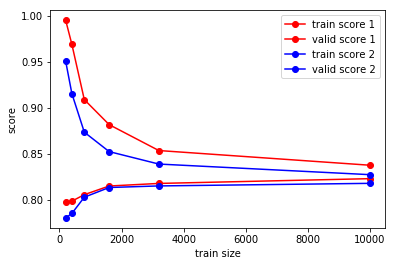

In [182]:
plt.plot(train_sizes,train_scores1, linestyle='-', marker = 'o', color = 'red', label = 'train score 1')
plt.plot(train_sizes,valid_scores1, linestyle='-', marker = 'o', color = 'red', label = 'valid score 1')
plt.plot(train_sizes,train_scores2, linestyle='-', marker = 'o', color = 'blue', label = 'train score 2')
plt.plot(train_sizes,valid_scores2, linestyle='-', marker = 'o', color = 'blue', label = 'valid score 2')
plt.xlabel('train size')
plt.ylabel("score")
plt.legend(loc = "upper right")
plt.show()

In [ ]:
## more data will not improve the model by a significant amount

## Understand Feature importance with GBM

In [189]:
feature_importance = pd.DataFrame(GBM.feature_importances_,index = X_train1.columns, columns =
                                  ['importance']).sort_values('importance', ascending = False)

In [190]:
feature_importance

,importance
PAY_0,0.148653
BILL_AMT1,0.090442
LIMIT_BAL,0.069055
BILL_AMT2,0.067688
BILL_AMT4,0.060473
BILL_AMT3,0.050502
PAY_AMT2,0.045813
PAY_AMT1,0.042666
BILL_AMT5,0.042268
PAY_AMT3,0.042188
